In [2]:
import numpy as np 
import pandas as pd

In [3]:
data = pd.read_csv('coordinate/mediapipe.csv')
df = pd.DataFrame()

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.615251,0.635261,0.566668,0.445570,0.362365,0.604238,0.551668,0.510494,0.472848,0.539286,...,-0.070641,-0.100918,0.051616,-0.046007,-0.085031,-0.074907,0.093728,0.002745,-0.031823,-0.033376
1,0.275164,0.273165,0.263036,0.272288,0.271147,0.222375,0.210598,0.213467,0.220532,0.234875,...,-0.223428,-0.236288,-0.105076,-0.172576,-0.183627,-0.179687,-0.098457,-0.142975,-0.155097,-0.159757
2,0.740110,0.818474,0.795306,0.690644,0.586307,0.586877,0.500216,0.455317,0.457351,0.486064,...,-0.435653,-0.574968,-0.114772,-0.247215,-0.405080,-0.521937,-0.119138,-0.251681,-0.379175,-0.483807
3,0.682279,0.740851,0.709402,0.612741,0.521498,0.571249,0.500548,0.468474,0.464008,0.496020,...,-0.564487,-0.668422,-0.259207,-0.410522,-0.537814,-0.634412,-0.257630,-0.391408,-0.494556,-0.576360
4,0.585878,0.689223,0.654408,0.490056,0.349746,0.558596,0.524571,0.498929,0.467499,0.450384,...,-0.082191,-0.100566,-0.012726,-0.171391,-0.226224,-0.216865,-0.021377,-0.187440,-0.247900,-0.259076
5,0.655390,0.754993,0.732877,0.622803,0.501689,0.573718,0.542695,0.520094,0.488792,0.493745,...,-0.050922,-0.069204,-0.018597,-0.164135,-0.198155,-0.177299,-0.075508,-0.216576,-0.254256,-0.263567
6,0.543905,0.376021,0.281455,0.199681,0.130567,0.448428,0.422527,0.415005,0.413165,0.556255,...,-0.075628,-0.091011,0.004247,-0.000512,-0.014199,-0.020866,0.050069,0.057821,0.051720,0.043549
7,0.889063,0.763604,0.629507,0.500777,0.398235,0.557300,0.363367,0.248627,0.164588,0.596289,...,-0.094208,-0.109956,0.015189,0.006705,-0.012088,-0.030248,0.083004,0.083823,0.072016,0.060496
8,0.560922,0.703413,0.791022,0.860337,0.935523,0.635320,0.684161,0.708885,0.721838,0.518974,...,-0.206240,-0.240589,-0.124097,-0.189975,-0.264740,-0.312985,-0.147547,-0.234134,-0.298900,-0.347228
9,0.568445,0.387563,0.281211,0.194010,0.102758,0.406746,0.382452,0.373300,0.370962,0.521858,...,-0.058319,-0.057341,-0.047058,0.025487,0.126297,0.186770,-0.037938,0.015354,0.058224,0.084989


In [52]:
# 벡터로 변환

vector_columnList = ['v0->1', 'v1->2', 'v2->3', 'v3->4', 'v0->5', 'v5->6', 'v6->7', 'v7->8', 'v0->9', 'v9->10',
                    'v10->11', 'v11->12', 'v0->13', 'v13->14', 'v14->15', 'v15->16', 'v0->17', 'v17->18', 'v18->19','v19->20']
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20]]

vector_data = []
for c, v in zip(vector_columnList, vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)

In [77]:
degree_list = [[0,1], [1,2], [2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14], [14,15], [16,17], [17,18], [18,19]]
result = pd.DataFrame()
for d in degree_list:
    a=vector_data[d[0]].x*vector_data[d[1]].x+vector_data[d[0]].y*vector_data[d[1]].y+vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2+vector_data[d[0]].y**2+vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2+vector_data[d[1]].y**2+vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

label = [0,1,1,1,0,0,2,2,2,3,3,3]

result

,vec0-1,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,1.036824,0.583659,0.366191,0.295945,0.099451,0.100106,0.331082,0.272319,0.128981,1.308312,1.524681,0.717169,1.400668,1.459299,0.606292
1,0.197509,0.520818,0.612299,0.237391,0.562300,0.386673,0.450372,0.701195,0.197028,0.486591,0.840162,0.862890,0.454211,0.450496,0.250542
2,0.623760,0.778419,0.276301,0.506860,0.281365,0.374718,0.437897,0.485939,0.467367,0.438341,0.495683,0.294111,0.559773,0.193997,0.101514
3,0.520630,0.773857,0.180307,0.227339,0.176826,0.274691,0.152711,0.202545,0.376891,0.122902,0.211682,0.180888,0.245768,0.059274,0.028764
4,0.957967,0.936008,0.392030,0.251140,0.239443,0.169934,0.307214,0.037024,0.059545,0.972872,1.767036,0.486581,1.118796,1.447088,0.378592
5,0.898438,0.712015,0.697588,0.532380,0.127409,0.295647,0.453924,0.151889,0.149268,0.817601,1.911014,0.551841,1.082429,1.571490,0.482685
6,0.476805,0.084813,0.109896,0.168133,0.104660,0.152188,0.170304,0.131258,0.088381,0.139916,0.147945,0.057232,0.255612,0.182431,0.089358
7,0.403844,0.089888,0.098791,0.122152,0.149168,0.082076,0.017226,0.084355,0.069390,0.135318,0.140613,0.049791,0.376204,0.266099,0.085620
8,0.511851,0.014394,0.371878,0.132395,0.117313,0.147764,0.061077,0.156126,0.096721,0.137418,0.228388,0.126843,0.237905,0.047932,0.144822
9,0.737136,0.194599,0.301572,0.380886,0.055490,0.103857,0.145965,0.195657,0.061021,0.680785,1.404317,0.304925,0.567698,0.118604,0.133273


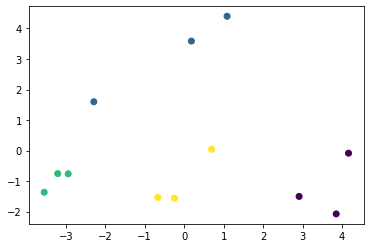

In [79]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standardScaler = StandardScaler()

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(standardScaler.fit_transform(result))
df = pd.DataFrame(data=printcipalComponents, columns=['x','y'])

plt.scatter(df.x, df.y, c=label)